<a href="https://colab.research.google.com/github/pranali97/Deep-learning-project/blob/main/Tomato_detection_leaves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem statement: Classify the tomato leaves if they are having disease or healthy using CNN model.

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten 
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
import cv2
import numpy as np
import os
import pandas as pd

In [ ]:
# re-sizing all the images
IMAGE_SIZE = [224, 224]

In [ ]:
#progressively loading images from file
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# creating generator
# Use the Image Data Generator to import the images from the dataset
datagen = ImageDataGenerator(rescale = 1./255,
                             shear_range = 0.2,
                             zoom_range = 0.2,
                             horizontal_flip = True,
                             vertical_flip=True,
                             rotation_range=30)
# prepare an iterators for each dataset
train_it = datagen.flow_from_directory('/content/drive/MyDrive/Train_data', 
                                       class_mode='categorical',
                                       target_size=(224, 224),
                                       batch_size=2,
                                       seed=7)
val_it = datagen.flow_from_directory('/content/drive/MyDrive/test_data', 
                                       class_mode='categorical',
                                       target_size=(224, 224),
                                       batch_size=2,
                                       seed=7)
test_it = datagen.flow_from_directory('/content/drive/MyDrive/test_data',  
                                       class_mode='categorical',
                                       target_size=(224, 224),
                                       batch_size=2,
                                       seed=7)


Found 200 images belonging to 2 classes.
Found 90 images belonging to 2 classes.
Found 90 images belonging to 2 classes.


In [ ]:
# Importing the Vgg 16 library as shown and adding preprocessing layer to the front of VGG
# Here we will be using imagenet weights
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58892288/58889256 [==============================] - 2s 0us/step


In [ ]:
# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [ ]:
output_classes = 2

In [ ]:
# layers can be added more 
x = Flatten()(vgg.output)
x = Dense(1000, activation='relu')(x)
# x = Dense(500, activation='relu')(x) 
prediction = Dense(output_classes, activation='softmax')(x)

In [ ]:
# creating a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [ ]:
# viewed the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
# passing the model what cost and optimization method to use
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
# fit the model
# Run the cell. It will take some time to execute
history_vgg= model.fit(train_it,validation_data=val_it,epochs=5)

Epoch 1/5
100/100 [==============================] - 174s 2s/step - loss: 1.6313 - accuracy: 0.8050 - val_loss: 0.2498 - val_accuracy: 0.9444
Epoch 2/5
100/100 [==============================] - 159s 2s/step - loss: 0.2989 - accuracy: 0.9500 - val_loss: 0.0625 - val_accuracy: 0.9667
Epoch 3/5
100/100 [==============================] - 160s 2s/step - loss: 0.1201 - accuracy: 0.9650 - val_loss: 0.0202 - val_accuracy: 0.9889
Epoch 4/5
100/100 [==============================] - 159s 2s/step - loss: 0.1581 - accuracy: 0.9700 - val_loss: 0.0161 - val_accuracy: 0.9889
Epoch 5/5
100/100 [==============================] - 159s 2s/step - loss: 0.0093 - accuracy: 0.9950 - val_loss: 0.0572 - val_accuracy: 0.9889


In [ ]:
history_vgg.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

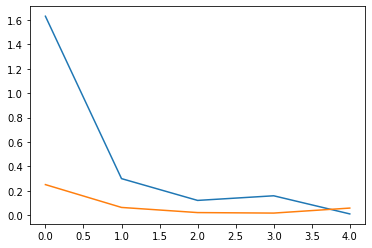

In [ ]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(history_vgg.history['loss'])
plt.plot(history_vgg.history['val_loss'])



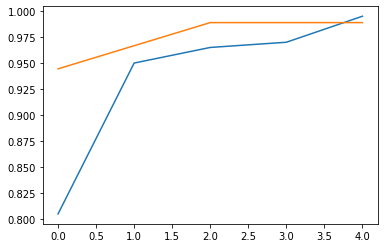

In [ ]:
#plot the accuracy
plt.plot(history_vgg.history['accuracy'])
plt.plot(history_vgg.history['val_accuracy'])

Resnet50 Model


In [ ]:
from tensorflow.keras.applications import ResNet50

In [ ]:
resnet = ResNet50(include_top=True,weights="imagenet",input_shape=(224,224,3),classes=1000)

102973440/102967424 [==============================] - 1s 0us/step


In [ ]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [ ]:
for layer in resnet.layers[:-2]:
  layer.trainable = False

In [ ]:
output_classes = 2

Adding Layers at End of Resnet50

In [ ]:
# our layers - you can add more if you want
x = Flatten()(resnet.layers[-2].output)
x = Dense(5000, activation='relu')(x)

prediction = Dense(output_classes, activation='softmax')(x)

In [ ]:
# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history_resnet= model.fit(train_it,validation_data=val_it,epochs=5)

Epoch 1/5
100/100 [==============================] - 61s 583ms/step - loss: 0.9876 - accuracy: 0.5150 - val_loss: 0.5303 - val_accuracy: 0.8222
Epoch 2/5
100/100 [==============================] - 58s 577ms/step - loss: 0.6594 - accuracy: 0.6200 - val_loss: 0.5316 - val_accuracy: 0.8111
Epoch 3/5
100/100 [==============================] - 58s 584ms/step - loss: 0.5836 - accuracy: 0.6950 - val_loss: 0.4890 - val_accuracy: 0.8222
Epoch 4/5
100/100 [==============================] - 58s 583ms/step - loss: 0.5661 - accuracy: 0.7050 - val_loss: 0.4611 - val_accuracy: 0.8333
Epoch 5/5
100/100 [==============================] - 58s 581ms/step - loss: 0.5230 - accuracy: 0.7750 - val_loss: 0.5480 - val_accuracy: 0.5444


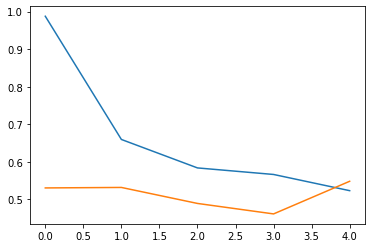

In [ ]:
plt.plot(history_resnet.history['loss'])
plt.plot(history_resnet.history['val_loss'])

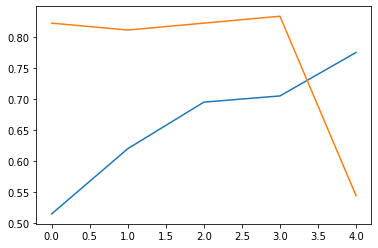

In [ ]:
plt.plot(history_resnet.history['accuracy'])
plt.plot(history_resnet.history['val_accuracy'])